In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\VIRAJ\Downloads\bank.csv",delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
data["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [5]:
df=data.drop(["y"],axis=1)

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [7]:
y=data[["y"]]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


In [8]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [9]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [10]:
ohe1=OneHotEncoder()
job=ohe1.fit_transform(df[["job"]])
job


<4521x12 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [11]:
job.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [12]:
df1=pd.DataFrame(job.toarray(),columns=ohe1.categories_)
df1

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
ohe2=OneHotEncoder()
marital=ohe2.fit_transform(df[["marital"]])
marital


<4521x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [14]:
df2=pd.DataFrame(marital.toarray(),columns=ohe2.categories_)
df2

,divorced,married,single
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4516,0.0,1.0,0.0
4517,0.0,1.0,0.0
4518,0.0,1.0,0.0
4519,0.0,1.0,0.0


In [15]:
le=LabelEncoder()
education=le.fit_transform(df.education)
education

array([0, 1, 2, ..., 1, 1, 2])

In [16]:
def func(i):
    if i=="primary":
        return 1
    if i=="secondary":
        return 2
    if i=="teritary":
        return 3
    else:
        return 0

In [17]:
l=list(map(func,df["education"]))
l

[1,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,


In [18]:
df2["education"]=l
df2

,divorced,married,single,education
0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,2
2,0.0,0.0,1.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,2
...,...,...,...,...
4516,0.0,1.0,0.0,2
4517,0.0,1.0,0.0,0
4518,0.0,1.0,0.0,2
4519,0.0,1.0,0.0,2


In [19]:
ohe3=OneHotEncoder()
default=ohe3.fit_transform(df[["default"]])
default


<4521x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [20]:
df3=pd.DataFrame(default.toarray(),columns=ohe3.categories_)
df3

,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4516,1.0,0.0
4517,0.0,1.0
4518,1.0,0.0
4519,1.0,0.0


In [21]:
ohe4=OneHotEncoder()
housing=ohe4.fit_transform(df[["housing"]])
housing


<4521x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [22]:
df4=pd.DataFrame(housing.toarray(),columns=ohe4.categories_)
df4

,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
4516,0.0,1.0
4517,0.0,1.0
4518,1.0,0.0
4519,1.0,0.0


In [23]:
ohe5=OneHotEncoder()
loan=ohe5.fit_transform(df[["loan"]])
loan


<4521x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [24]:
df5=pd.DataFrame(loan.toarray(),columns=ohe5.categories_)
df5

,no,yes
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
4516,1.0,0.0
4517,0.0,1.0
4518,1.0,0.0
4519,1.0,0.0


In [25]:
ohe6=OneHotEncoder()
contact=ohe6.fit_transform(df[["contact"]])
contact


<4521x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [26]:
df6=pd.DataFrame(contact.toarray(),columns=ohe6.categories_)
df6

,cellular,telephone,unknown
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
4516,1.0,0.0,0.0
4517,0.0,0.0,1.0
4518,1.0,0.0,0.0
4519,1.0,0.0,0.0


In [27]:
ohe7=OneHotEncoder()
month=ohe7.fit_transform(df[["month"]])
month


<4521x12 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [28]:
df7=pd.DataFrame(month.toarray(),columns=ohe7.categories_)
df7

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
ohe8=OneHotEncoder()
poutcome=ohe8.fit_transform(df[["poutcome"]])
poutcome


<4521x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4521 stored elements in Compressed Sparse Row format>

In [30]:
df8=pd.DataFrame(poutcome.toarray(),columns=ohe8.categories_)
df8

,failure,other,success,unknown
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
4516,0.0,0.0,0.0,1.0
4517,0.0,0.0,0.0,1.0
4518,0.0,0.0,0.0,1.0
4519,0.0,1.0,0.0,0.0


In [31]:
new_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=1)
new_df

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
ohe9=LabelEncoder()
label=ohe9.fit_transform(y)
label

C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
def f1(a):
    if a=="yes":
        return 1
    else:
        return 0

In [59]:
l=list(map(f1,label))
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [34]:
data.drop(["job","marital","education","default","housing","loan","contact","month","poutcome","y"],axis=1,inplace=True)

In [35]:
data

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [36]:
ndf=pd.concat([new_df,data],axis=1)

In [37]:
ndf

,"(admin.,)","(blue-collar,)","(entrepreneur,)","(housemaid,)","(management,)","(retired,)","(self-employed,)","(services,)","(student,)","(technician,)",...,"(other,)","(success,)","(unknown,)",age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,30,1787,19,79,1,-1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,33,4789,11,220,1,339,4
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35,1350,16,185,1,330,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,30,1476,3,199,4,-1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,33,-333,30,329,5,-1,0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,57,-3313,9,153,1,-1,0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,57,295,19,151,11,-1,0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,28,1137,6,129,4,211,3


# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm=SMOTE(sampling_strategy=1)

In [40]:
x,y=sm.fit_resample(ndf.to_numpy(),df9.to_numpy())

In [41]:
pd.DataFrame(y)[0].value_counts()

0    4000
1    4000
Name: 0, dtype: int64

In [42]:
x.shape

(8000, 48)

In [43]:
x_df=pd.DataFrame(x)

In [44]:
x_df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.0,30.000000,1787.000000,19.000000,79.000000,1.000000,-1.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.000000,0.000000,0.0,33.000000,4789.000000,11.000000,220.000000,1.000000,339.000000,4.000000
2,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,35.000000,1350.000000,16.000000,185.000000,1.000000,330.000000,1.000000
3,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.0,30.000000,1476.000000,3.000000,199.000000,4.000000,-1.000000,0.000000
4,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.0,59.000000,0.000000,5.000000,226.000000,1.000000,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.745935,0.000000,0.0,0.0,0.254065,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.0,36.319108,654.298800,27.270326,1228.410566,3.254065,-1.000000,0.000000
7996,0.251879,0.748121,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,1.0,31.007514,241.015028,17.725579,409.229336,1.251879,-1.000000,0.000000
7997,0.912216,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.087784,0.0,...,0.000000,0.087784,0.0,50.190917,2405.900547,4.457948,311.820753,1.438919,179.034378,2.087784
7998,0.614586,0.000000,0.0,0.0,0.385414,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.614586,0.0,36.020775,285.833153,26.531270,439.270937,1.000000,119.312271,1.000000


In [45]:
y_df=pd.DataFrame(y)

In [46]:
y_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
7995,1
7996,1
7997,1
7998,1


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,train_size=0.7)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,train_size=0.7)

In [48]:
def knn_train_error(k):
    l1=[]
    for i in range(k):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_train,y_train)
            y_predicted=model.predict(x_trainf)
            accuracy=accuracy_score(y_trainf,y_predicted)
            train_error=1-accuracy
            l1.append(train_error)
    return l1

In [49]:
train_error=knn_train_error(10)
train_error

C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.0,
 0.07425363613166625,
 0.10206685378923197,
 0.11737688185761674,
 0.12707323296759376]

In [50]:
def knn_cv_error(k):
    l2=[]
    for i in range(k):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_trainf,y_trainf)
            y_predicted=model.predict(x_cv)
            accuracy=accuracy_score(y_cv,y_predicted)
            cv_error=1-accuracy
            l2.append(cv_error)
    return l2

In [51]:
cv_error=knn_cv_error(10)
cv_error

C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.1403926234384295,
 0.15585960737656157,
 0.16418798334324802,
 0.17013682331945268,
 0.1772754312908983]

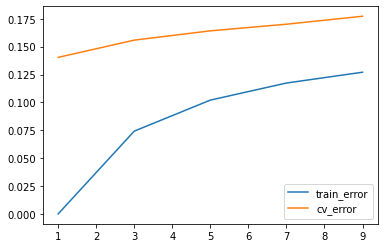

In [52]:
import matplotlib.pyplot as plt
plt.plot([y for y in range(1,10,2)],train_error,label="train_error")
plt.plot([y for y in range(1,10,2)],cv_error,label="cv_error")
plt.legend()
plt.show()